In [80]:
%matplotlib inline
import numpy as np 
from datetime import datetime, timedelta
from pytz import timezone
from matplotlib import pyplot as plt
from skyfield import api
from skyfield.api import Loader
from skyfield import almanac

In [270]:
plt.rcParams['figure.figsize'] = [15, 15]

In [4]:
load = Loader('./data')

In [5]:
manhattan_beach = api.Topos('33.881519 N', '118.388177 W')

In [6]:
ts = load.timescale()

In [7]:
ephemeris = load('de421.bsp')

In [8]:
t0 = ts.utc(2019, 1, 1)
t1 = ts.utc(2019, 12, 31)
t, y = almanac.find_discrete(t0, t1, almanac.seasons(ephemeris))

for yi, ti in zip(y, t):
    print(yi, almanac.SEASON_EVENTS[yi], ti.utc_iso(' '))

0 Vernal Equinox 2019-03-20 21:58:26Z
1 Summer Solstice 2019-06-21 15:54:15Z
2 Autumnal Equinox 2019-09-23 07:50:11Z
3 Winter Solstice 2019-12-22 04:19:26Z


In [9]:
t0 = ts.utc(2019, 5, 25, 4)
t1 = ts.utc(2019, 5, 26, 4)
t, y = almanac.find_discrete(t0, t1, almanac.sunrise_sunset(ephemeris, manhattan_beach))

print(t.utc_iso())
print(y)

['2019-05-25T12:46:26Z', '2019-05-26T02:54:55Z']
[ True False]


In [10]:
t0 = ts.utc(2019, 5, 1)
t1 = ts.utc(2019, 5, 31)
t, y = almanac.find_discrete(t0, t1, almanac.moon_phases(ephemeris))

print(t.utc_iso())
print(y)
print([ almanac.MOON_PHASES[yi] for yi in y ])

['2019-05-04T22:45:30Z', '2019-05-12T01:12:14Z', '2019-05-18T21:11:21Z', '2019-05-26T16:33:35Z']
[0 1 2 3]
['New Moon', 'First Quarter', 'Full Moon', 'Last Quarter']


In [11]:
from skyfield.api import Star
from skyfield.data import hipparcos

with load.open(hipparcos.URL) as f:
    df = hipparcos.load_dataframe(f)
    
barnards_star = Star.from_dataframe(df.loc[87937])

In [12]:
earth = ephemeris['earth']
t = ts.now()
astrometric = earth.at(t).observe(barnards_star)
ra, dec, distance = astrometric.radec()
print(ra, dec, distance)

17h 57m 47.46s +04deg 44' 56.9" 2.06265e+14 au


In [13]:
df.head()

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
1,9.10,0.000912,1.089013,3.54,-5.20,-1.88,0.000061,1991.25
2,9.27,0.003797,-19.498837,21.90,181.21,-0.93,0.000253,1991.25
3,6.61,0.005008,38.859286,2.81,5.24,-2.91,0.000334,1991.25
4,8.06,0.008382,-51.893546,7.75,62.85,0.16,0.000559,1991.25
5,8.55,0.009965,-40.591224,2.87,2.53,9.07,0.000664,1991.25


In [542]:
bright = df[df['magnitude'] <= 5.]

In [543]:
len(bright)

1627

In [544]:
bright.head(10)

,magnitude,ra_degrees,dec_degrees,parallax_mas,ra_mas_per_year,dec_mas_per_year,ra_hours,epoch_year
hip,,,,,,,,
122,4.78,0.399379,-77.065294,14.77,-56.52,-176.95,0.026625,1991.25
154,4.37,0.489965,-6.013972,7.86,46.62,-41.32,0.032664,1991.25
301,4.55,0.934885,-17.335970,14.31,28.57,-7.28,0.062326,1991.25
355,4.99,1.125510,-10.509494,2.03,-6.49,-11.88,0.075034,1991.25
443,4.61,1.333941,-5.707833,25.38,-8.29,88.19,0.088929,1991.25
677,2.07,2.096533,29.090828,33.60,135.68,-162.95,0.139769,1991.25
746,2.28,2.292040,59.150218,59.89,523.39,-180.42,0.152803,1991.25
765,3.88,2.352249,-45.746988,23.28,122.15,-180.13,0.156817,1991.25
910,4.89,2.816284,-15.467323,52.94,-84.20,-269.31,0.187752,1991.25


In [545]:
bright_stars = Star.from_dataframe(bright)

In [596]:
t = ts.now()
astrometric = earth.at(t).observe(bright_stars)
ra, dec, distance = astrometric.radec()

In [988]:
def magnitude_to_marker_size(v):
    if v <= -1.:
        return 132.
    elif v <= 0.0:
        return 112.
    elif v <= 0.5:
        return 92.
    elif v <= 1.:
        return 72.
    elif v <= 1.5:
        return 52.
    else:
        if v <= 2.:
            v = 2.0
        return 1.52 ** (10. ** (0.135*(8.7-v)))

In [989]:
mags = bright['magnitude'].tolist()
sizes = [ magnitude_to_marker_size(float(v)) for v in mags ]

[]

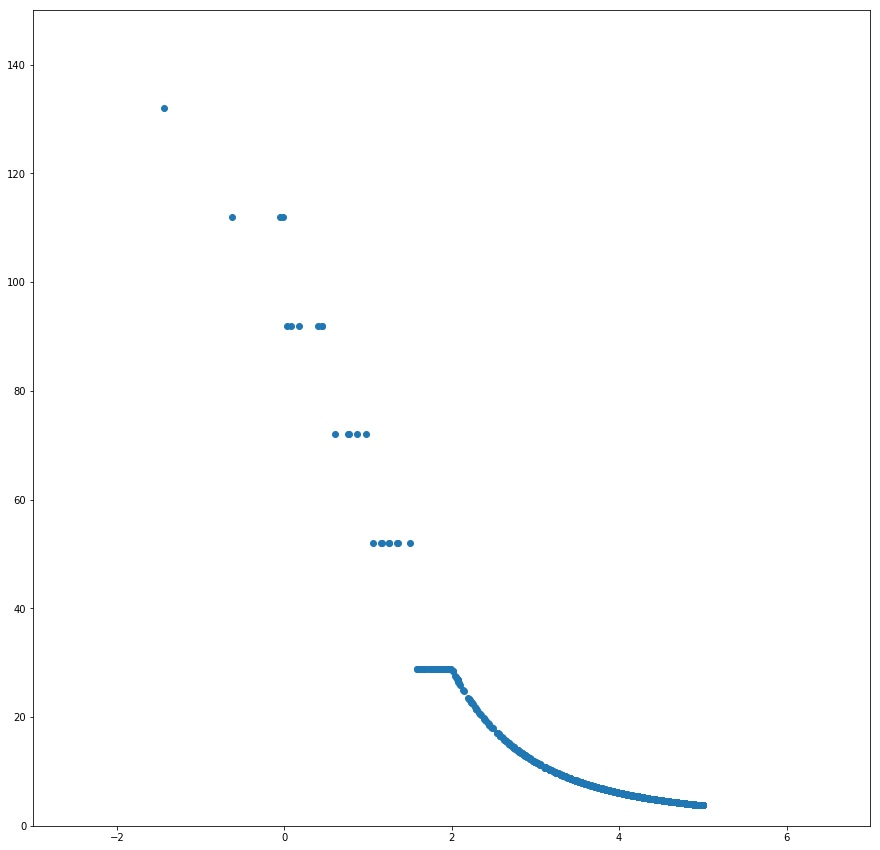

In [990]:
plt.scatter(mags, sizes)
plt.xlim(-3., 7.)
plt.ylim(0., 150.)
plt.plot()

[]

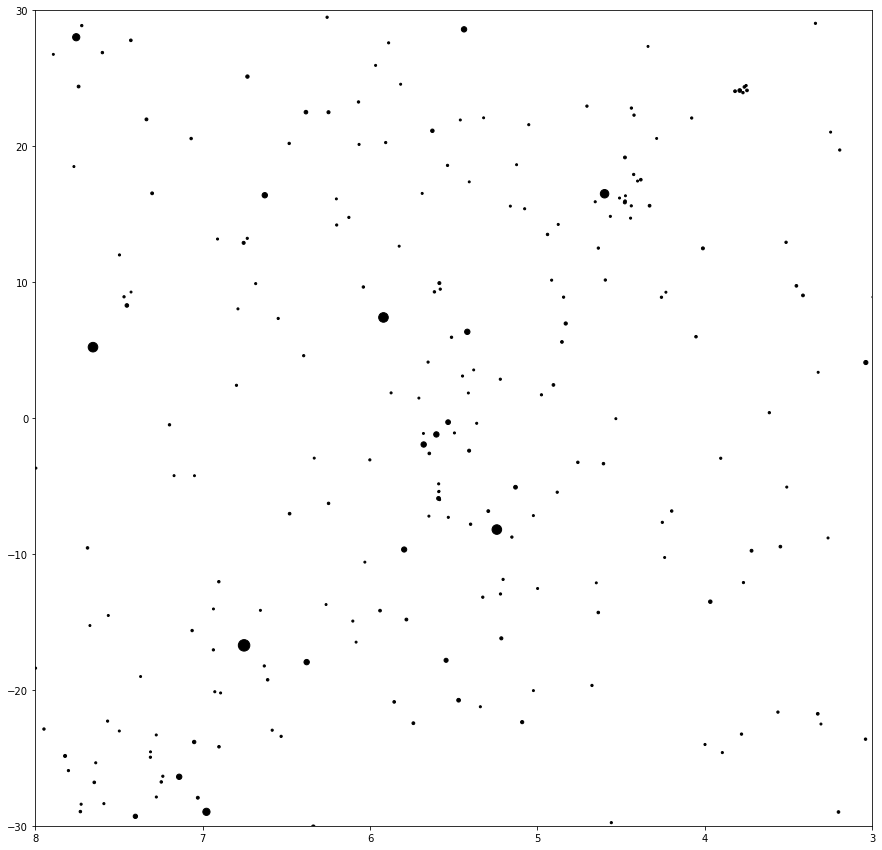

In [991]:
plt.scatter(ra.hours, dec.degrees, [ magnitude_to_marker_size(v) for v in mag ], 'k')
plt.xlim(8.0, 3.0)
plt.ylim(-30, 30)
plt.plot()

In [992]:
observer = earth + manhattan_beach
theta, r, mag = [], [], []
for i in range(len(bright)):
    star = Star.from_dataframe(bright.iloc[i])
    app = observer.at(t).observe(star).apparent()
    alt, az, _ = app.altaz()
    theta.append(az.radians)
    r.append(alt.degrees)
    mag.append(bright.iloc[i]['magnitude'])

In [993]:
observer = earth + manhattan_beach
sun_apparent = observer.at(t).observe(ephemeris['sun']).apparent()
sun_alt, sun_az, _ = sun_apparent.altaz()
moon_apparent = observer.at(t).observe(ephemeris['moon']).apparent()
moon_alt, moon_az, _ = moon_apparent.altaz()
mercury_apparent = observer.at(t).observe(ephemeris['mercury']).apparent()
mercury_alt, mercury_az, _ = mercury_apparent.altaz()
venus_apparent = observer.at(t).observe(ephemeris['venus']).apparent()
venus_alt, venus_az, _ = venus_apparent.altaz()
mars_apparent = observer.at(t).observe(ephemeris['mars']).apparent()
mars_alt, mars_az, _ = mars_apparent.altaz()
jupiter_apparent = observer.at(t).observe(ephemeris['JUPITER BARYCENTER']).apparent()
jupiter_alt, jupiter_az, _ = jupiter_apparent.altaz()
saturn_apparent = observer.at(t).observe(ephemeris['SATURN BARYCENTER']).apparent()
saturn_alt, saturn_az, _ = saturn_apparent.altaz()

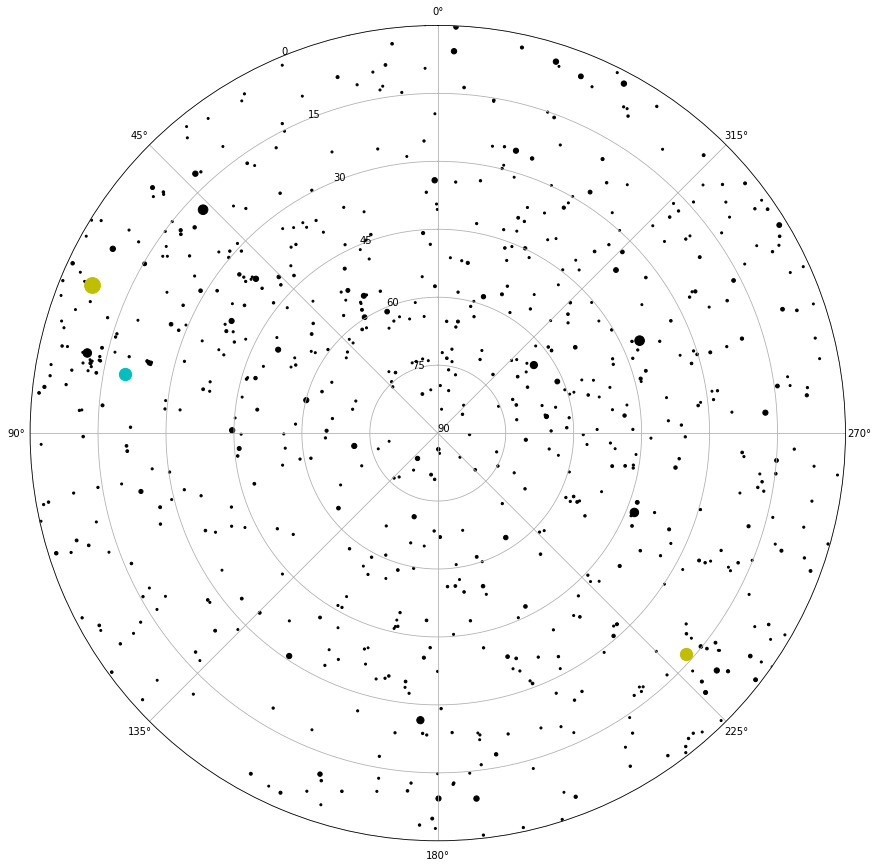

In [994]:
ax = plt.subplot(111, projection='polar')
ax.set_rlim(0, 90)
ax.set_theta_zero_location('N')
ax.set_theta_direction(1)
ax.set_yticks(np.arange(0, 105, 15))
ax.set_yticklabels(ax.get_yticks()[::-1])
plt.scatter(np.array(theta), 90.-np.array(r), [ magnitude_to_marker_size(v) for v in mag ], 'k')
plt.scatter(sun_az.radians, 90.-sun_alt.degrees, 250, 'y')
plt.scatter(moon_az.radians, 90.-moon_alt.degrees, 220, 'b')
plt.scatter(mercury_az.radians, 90.-mercury_alt.degrees, 150, 'y')
plt.scatter(venus_az.radians, 90.-venus_alt.degrees, 150, 'c')
plt.scatter(mars_az.radians, 90.-mars_alt.degrees, 150, 'r')
plt.scatter(jupiter_az.radians, 90.-jupiter_alt.degrees, 150, 'y')
plt.scatter(saturn_az.radians, 90.-saturn_alt.degrees, 150, 'y')
plt.show()